# Shell Sort

## Importando bibliotecas

In [1]:
import numpy as np
from time import perf_counter
from pandas import DataFrame
from seaborn import pointplot, set_style

# Constante
LISTA_DE_TAMANHOS = np.array([1000, 2000, 3000,
                              4000, 5000, 8000,
                              11_000, 15_000])

## Algoritmo

In [2]:
def shell(arr:'np.ndarray[float]'):
  N = len(arr)
  h = N // 2
  while h > 0:
    for i in range(h, N):
      while i >= h and arr[i-h] > arr[i]:
        arr[i], arr[i-h] = arr[i-h], arr[i]
        i -= h
    h //= 2

## Bateria de testes de desempenho

In [3]:
data = dict()

for ordem in ['crescente', 'aleatoria', 'decrescente']:
  tempos = list()
  for tamanho in LISTA_DE_TAMANHOS:
    # Gerando amostra do teste
    if ordem == 'crescente':
      amostra = np.arange(tamanho, dtype=float)
    elif ordem == 'decrescente':
      amostra = np.arange(tamanho, dtype=float)[::-1].copy()
    else:
      amostra = np.random.sample(tamanho)
    
    # testando performance
    start = perf_counter()
    shell(amostra)
    stop = perf_counter()
    
    # salvando resultado
    tempos.append(stop - start)
  data[ordem] = tempos
data['tamanhos'] = LISTA_DE_TAMANHOS

df = DataFrame(data=data)
df.style.hide_index()

crescente,aleatoria,decrescente,tamanhos
0.007063,0.010864,0.009737,1000
0.009078,0.030629,0.018756,2000
0.015610,0.046888,0.028692,3000
0.018076,0.069963,0.040097,4000
0.024037,0.096083,0.057193,5000
0.045790,0.173373,0.091979,8000
0.059943,0.244339,0.128152,11000
0.084569,0.457114,0.175388,15000


## Resultados

O pior caso é quando a lista se encontra ordenada de forma aleatoria


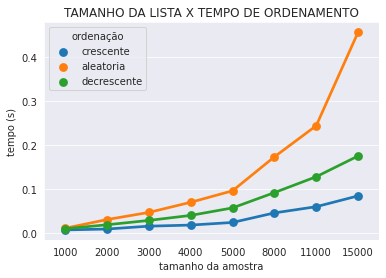

In [4]:
# Remodela o dataframe para uma versão longa mais fácil de plotar
long_df = df.melt(id_vars='tamanhos', var_name='ordenação', value_name='tempos')

set_style('darkgrid')
pointplot(
  data=long_df,
  x='tamanhos',
  y='tempos',
  hue='ordenação',
  ).set(
    xlabel='tamanho da amostra',
    ylabel='tempo (s)',
    title='TAMANHO DA LISTA X TEMPO DE ORDENAMENTO')

ordem = long_df.sort_values(by='tempos', ascending=False)['ordenação'].values[0]
print(f'O pior caso é quando a lista se encontra ordenada de forma {ordem}')